In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [261]:
df = pd.read_csv('Plac.csv')

In [262]:
df = df.set_index("sl_no")
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


In [263]:
newdf = pd.concat([df,pd.get_dummies(df.degree_t,prefix='degree'),pd.get_dummies(df.hsc_s,prefix='hscs')],axis="columns")
newdf = newdf.drop(["degree_t","degree_Others","hscs_Arts","hsc_s"],axis='columns')



In [264]:
newdf = newdf.replace("Others",0)
newdf = newdf.replace("Central",1)

newdf = newdf.replace("Not Placed",0)
newdf = newdf.replace("Placed",1)

newdf = newdf.replace("Mkt&HR",0)
newdf = newdf.replace("Mkt&Fin",1)

newdf = newdf.replace("No",0)
newdf = newdf.replace("Yes",1)

sal = df.salary
newdf = newdf.drop(["gender","salary"],axis="columns")

In [265]:
newdf

,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,degree_Comm&Mgmt,degree_Sci&Tech,hscs_Commerce,hscs_Science
sl_no,,,,,,,,,,,,,,
1,67.00,0,91.00,0,58.00,0,55.0,0,58.80,1,0,1,1,0
2,79.33,1,78.33,0,77.48,1,86.5,1,66.28,1,0,1,0,1
3,65.00,1,68.00,1,64.00,0,75.0,1,57.80,1,1,0,0,0
4,56.00,1,52.00,1,52.00,0,66.0,0,59.43,0,0,1,0,1
5,85.80,1,73.60,1,73.30,0,96.8,1,55.50,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,80.60,0,82.00,0,77.60,0,91.0,1,74.49,1,1,0,1,0
212,58.00,0,60.00,0,72.00,0,74.0,1,53.62,1,0,1,0,1
213,67.00,0,67.00,0,73.00,1,59.0,1,69.72,1,1,0,1,0


In [266]:
newdf.corr()

## Important Features are

,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,degree_Comm&Mgmt,degree_Sci&Tech,hscs_Commerce,hscs_Science
ssc_p,1.000000,-0.116194,0.511472,-0.066996,0.538404,0.175675,0.261993,0.172536,0.388478,0.607889,-0.179581,0.221235,-0.101323,0.189847
ssc_b,-0.116194,1.000000,0.137013,0.605883,-0.038070,0.040744,0.018991,-0.051565,-0.083120,-0.037297,0.094939,-0.101060,0.056671,-0.058505
hsc_p,0.511472,0.137013,1.000000,0.019548,0.434206,0.141025,0.245113,0.241630,0.354823,0.491228,0.112816,-0.053599,0.258093,-0.226675
hsc_b,-0.066996,0.605883,0.019548,1.000000,-0.067229,-0.038357,-0.039108,0.002232,-0.090201,-0.016945,0.027440,-0.086548,0.073522,-0.126446
degree_p,0.538404,-0.038070,0.434206,-0.067229,1.000000,0.122648,0.224470,0.218286,0.402364,0.479861,-0.032755,0.123477,-0.022724,0.092006
workex,0.175675,0.040744,0.141025,-0.038357,0.122648,1.000000,0.056735,0.191174,0.168811,0.276060,-0.102517,0.102962,-0.056719,0.033270
etest_p,0.261993,0.018991,0.245113,-0.039108,0.224470,0.056735,1.000000,0.236315,0.218055,0.127639,-0.012531,0.009748,-0.021732,0.055352
specialisation,0.172536,-0.051565,0.241630,0.002232,0.218286,0.191174,0.236315,1.000000,0.105728,0.250655,0.101331,-0.061503,0.129985,-0.166639
mba_p,0.388478,-0.083120,0.354823,-0.090201,0.402364,0.168811,0.218055,0.105728,1.000000,0.076922,-0.102088,0.125009,-0.049415,0.048050
status,0.607889,-0.037297,0.491228,-0.016945,0.479861,0.276060,0.127639,0.250655,0.076922,1.000000,0.046849,0.008688,0.024414,0.007279


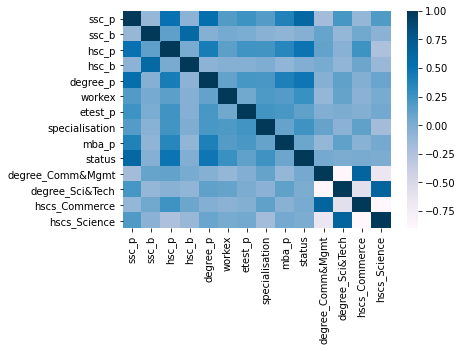

In [267]:
sns.heatmap(newdf.corr(),cmap="PuBu")

(array([ 3.,  4.,  9.,  9.,  7., 14., 12.,  5.,  1.,  3.]),
 array([37. , 41.5, 46. , 50.5, 55. , 59.5, 64. , 68.5, 73. , 77.5, 82. ]),
 <a list of 10 Patch objects>)

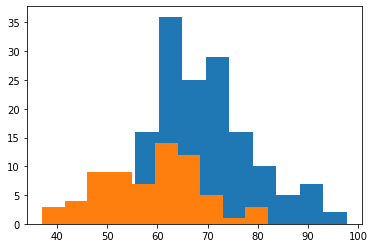

In [268]:
plt.hist(df[df["status"]=="Placed"].hsc_p)
plt.hist(df[df["status"]=="Not Placed"].hsc_p)

(array([ 4.,  5.,  5., 18.,  6., 14.,  4.,  6.,  3.,  2.]),
 array([40.89 , 44.581, 48.272, 51.963, 55.654, 59.345, 63.036, 66.727,
        70.418, 74.109, 77.8  ]),
 <a list of 10 Patch objects>)

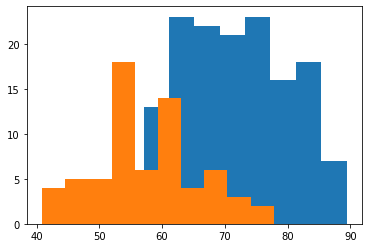

In [269]:
plt.hist(df[df["status"]=="Placed"].ssc_p)
plt.hist(df[df["status"]=="Not Placed"].ssc_p)

(array([ 6.,  7., 12., 15.,  8., 12.,  1.,  2.,  2.,  2.]),
 array([50. , 52.9, 55.8, 58.7, 61.6, 64.5, 67.4, 70.3, 73.2, 76.1, 79. ]),
 <a list of 10 Patch objects>)

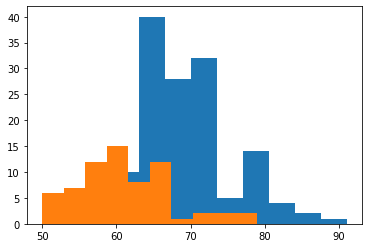

In [270]:

plt.hist(df[df["status"]=="Placed"].degree_p)
plt.hist(df[df["status"]=="Not Placed"].degree_p)

In [271]:
ssc_greaterthan79 = df["ssc_p"]>=79

In [272]:
ssc_greaterthan79 = ssc_greaterthan79.replace(False,0)
ssc_greaterthan79 = pd.Series(ssc_greaterthan79,name='ssc_greaterThan79')

In [273]:
newdf = pd.concat([newdf,ssc_greaterthan79],axis='columns')

In [274]:
newdf.corr()

,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,degree_Comm&Mgmt,degree_Sci&Tech,hscs_Commerce,hscs_Science,ssc_greaterThan79
ssc_p,1.000000,-0.116194,0.511472,-0.066996,0.538404,0.175675,0.261993,0.172536,0.388478,0.607889,-0.179581,0.221235,-0.101323,0.189847,0.657480
ssc_b,-0.116194,1.000000,0.137013,0.605883,-0.038070,0.040744,0.018991,-0.051565,-0.083120,-0.037297,0.094939,-0.101060,0.056671,-0.058505,-0.185528
hsc_p,0.511472,0.137013,1.000000,0.019548,0.434206,0.141025,0.245113,0.241630,0.354823,0.491228,0.112816,-0.053599,0.258093,-0.226675,0.279833
hsc_b,-0.066996,0.605883,0.019548,1.000000,-0.067229,-0.038357,-0.039108,0.002232,-0.090201,-0.016945,0.027440,-0.086548,0.073522,-0.126446,-0.129323
degree_p,0.538404,-0.038070,0.434206,-0.067229,1.000000,0.122648,0.224470,0.218286,0.402364,0.479861,-0.032755,0.123477,-0.022724,0.092006,0.355553
workex,0.175675,0.040744,0.141025,-0.038357,0.122648,1.000000,0.056735,0.191174,0.168811,0.276060,-0.102517,0.102962,-0.056719,0.033270,0.068416
etest_p,0.261993,0.018991,0.245113,-0.039108,0.224470,0.056735,1.000000,0.236315,0.218055,0.127639,-0.012531,0.009748,-0.021732,0.055352,0.222960
specialisation,0.172536,-0.051565,0.241630,0.002232,0.218286,0.191174,0.236315,1.000000,0.105728,0.250655,0.101331,-0.061503,0.129985,-0.166639,0.098005
mba_p,0.388478,-0.083120,0.354823,-0.090201,0.402364,0.168811,0.218055,0.105728,1.000000,0.076922,-0.102088,0.125009,-0.049415,0.048050,0.297112
status,0.607889,-0.037297,0.491228,-0.016945,0.479861,0.276060,0.127639,0.250655,0.076922,1.000000,0.046849,0.008688,0.024414,0.007279,0.301739


**Important Features** : ssc_p,hsc_p,degree_p,ssc_greaterThan79,workex,specialisation,etest_p

In [275]:
newdf = newdf.drop(['ssc_b','hsc_b','degree_Sci&Tech','hscs_Science','hscs_Commerce'],axis='columns')

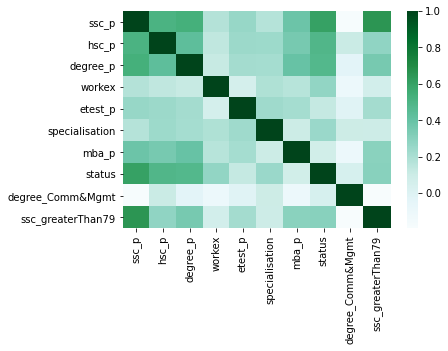

In [280]:
sns.heatmap(newdf.corr(),cmap='BuGn')

In [455]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(newdf.drop(['status'],axis='columns'),newdf.status)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=50,n_estimators=80)

model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9259259259259259

In [424]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(RandomForestClassifier(),{
    'n_estimators':[10,20,30,40,50,60,70,80],
    'max_depth':[5,10,15,20,25,30,40,50,60]
},cv=4, return_train_score=False)

clf.fit(newdf.drop(['status'],axis='columns'),newdf.status)
clf.cv_results_

{'mean_fit_time': array([0.01372921, 0.02194166, 0.03191358, 0.04165393, 0.05087304,
        0.06330901, 0.0840227 , 0.0992344 , 0.01446491, 0.02344495,
        0.03216422, 0.04138964, 0.05111337, 0.06083751, 0.07106036,
        0.08078504, 0.01196754, 0.02168125, 0.03191501, 0.04088295,
        0.05161297, 0.0608452 , 0.07054681, 0.08027589, 0.0119648 ,
        0.02169961, 0.03266466, 0.04242414, 0.05211252, 0.0718013 ,
        0.07505286, 0.08054352, 0.01221961, 0.02194184, 0.03141648,
        0.04113835, 0.05085641, 0.06107903, 0.07105523, 0.08102578,
        0.01221663, 0.0219577 , 0.03191888, 0.0419172 , 0.05136234,
        0.06157917, 0.07928818, 0.08652318, 0.0137136 , 0.0241853 ,
        0.03515601, 0.04712373, 0.05535233, 0.06532574, 0.0805347 ,
        0.09075695, 0.01346385, 0.02418554, 0.03590405, 0.04288471,
        0.05784571, 0.06831712, 0.07953739, 0.08303595, 0.01196808,
        0.02169234, 0.03215671, 0.04139751, 0.05136317, 0.0608362 ,
        0.07081026, 0.08028525]

In [425]:
ansgrid=pd.DataFrame(clf.cv_results_)
ansgrid.sort_values('mean_test_score',ascending=False)

## Optimal Parameters

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
63,0.083036,4.476453e-03,0.006483,0.000500,50,80,"{'max_depth': 50, 'n_estimators': 80}",0.833333,0.870370,0.925926,0.811321,0.860238,0.043400,1
56,0.013464,8.642420e-04,0.002244,0.000432,50,10,"{'max_depth': 50, 'n_estimators': 10}",0.888889,0.851852,0.888889,0.811321,0.860238,0.032035,1
29,0.071801,5.939974e-03,0.006225,0.000839,20,60,"{'max_depth': 20, 'n_estimators': 60}",0.870370,0.851852,0.925926,0.792453,0.860150,0.047652,3
13,0.060838,2.329436e-05,0.005486,0.000497,10,60,"{'max_depth': 10, 'n_estimators': 60}",0.851852,0.870370,0.925926,0.792453,0.860150,0.047652,3
22,0.070547,4.236630e-04,0.005999,0.000017,15,70,"{'max_depth': 15, 'n_estimators': 70}",0.851852,0.888889,0.925926,0.773585,0.860063,0.056380,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.013729,1.298258e-03,0.002245,0.000431,5,10,"{'max_depth': 5, 'n_estimators': 10}",0.759259,0.851852,0.907407,0.754717,0.818309,0.064410,68
5,0.063309,3.029982e-03,0.006247,0.000424,5,60,"{'max_depth': 5, 'n_estimators': 60}",0.833333,0.851852,0.870370,0.716981,0.818134,0.059851,69
16,0.011968,8.344650e-07,0.002244,0.000432,15,10,"{'max_depth': 15, 'n_estimators': 10}",0.814815,0.870370,0.888889,0.698113,0.818047,0.074416,70
42,0.031919,2.494780e-05,0.003493,0.000488,30,30,"{'max_depth': 30, 'n_estimators': 30}",0.814815,0.851852,0.907407,0.698113,0.818047,0.076685,70


In [457]:
import pickle

In [458]:
saved_model=pickle.dumps(model)

In [462]:
pickle.dump(model,open("RandomForest.pkl","wb"))

In [463]:
X_train

,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,degree_Comm&Mgmt,ssc_greaterThan79
sl_no,,,,,,,,,
63,86.50,64.2,67.4,0,59.00,1,59.69,0,1.0
91,85.00,90.0,82.0,0,92.00,1,68.03,1,1.0
4,56.00,52.0,52.0,0,66.00,0,59.43,0,0.0
55,74.00,60.0,69.0,0,78.00,0,65.56,1,0.0
80,69.00,62.0,66.0,0,75.00,0,67.99,0,0.0
...,...,...,...,...,...,...,...,...,...
190,54.00,77.6,69.2,0,95.65,1,66.94,1,0.0
93,60.23,69.0,66.0,0,72.00,1,59.47,1,0.0
135,77.44,92.0,72.0,1,94.00,1,67.13,1,0.0
